In [1]:
pwd

'/home/nbuser/library'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
sns.set_style('darkgrid')
# import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x : '{:.3f}'.format(x))

from subprocess import check_output

print(check_output(["ls", "./"]).decode('utf8'))

electricity_prediction
house_price
house_price_prediction.ipynb
README.md
test.csv
time_series_prediction.ipynb



### import File

In [4]:
train = pd.read_csv('./house_price/train.csv')
test = pd.read_csv('./house_price/test.csv')

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print("Shape before dropping Id feature ", train.shape)
print("Shape before dropping Id feature ", test.shape)

Shape before dropping Id feature  (1460, 81)
Shape before dropping Id feature  (1459, 80)


In [7]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

print("Shape after dropping Id feature ", train.shape)
print("Shape after dropping Id feature ", test.shape)

Shape after dropping Id feature  (1460, 80)
Shape after dropping Id feature  (1459, 79)


### Data Processing

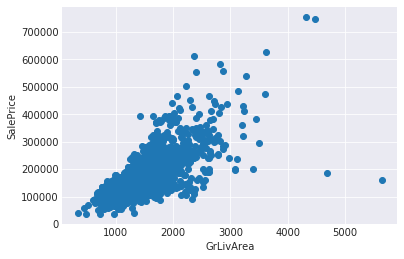

In [8]:
fig, ax = plt.subplots()

ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

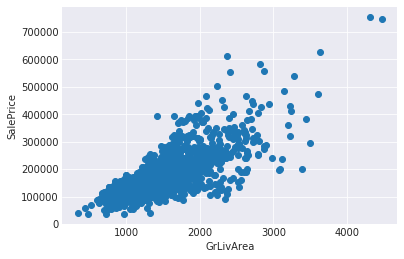

In [9]:
### Deleting Outliers

train = train.drop(train[(train.GrLivArea > 4000) & (train.SalePrice < 300000)].index)

fig, ax = plt.subplots()

ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

### Target Variable


 mu = 180932.92 and sigma = 79467.79



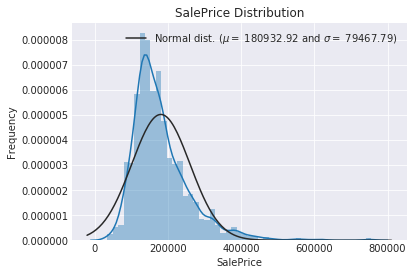

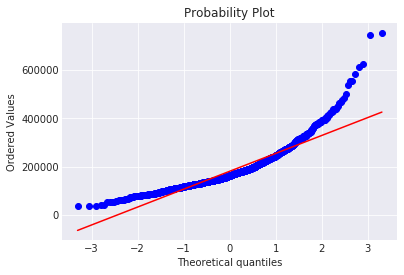

In [10]:
sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma) )

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
          loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# qq plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Log Transformation


 mu = 12.02 and sigma = 0.40



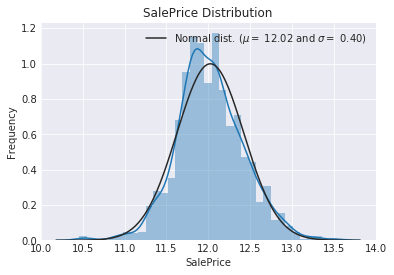

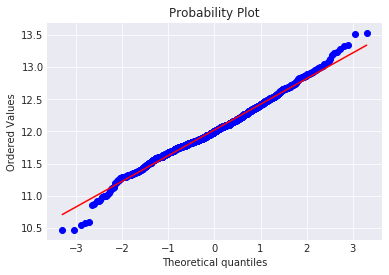

In [11]:
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma) )

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
          loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# qq plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Features Engineering

In [12]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print('all data size is ', all_data.shape)

all data size is  (2917, 79)


### Missing Data

In [13]:
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0 ].index).sort_values(
ascending=False)[:30]

missing_data = pd.DataFrame({"Missing Ratio " : all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


Text(0,0.5,'Percent of missing values')

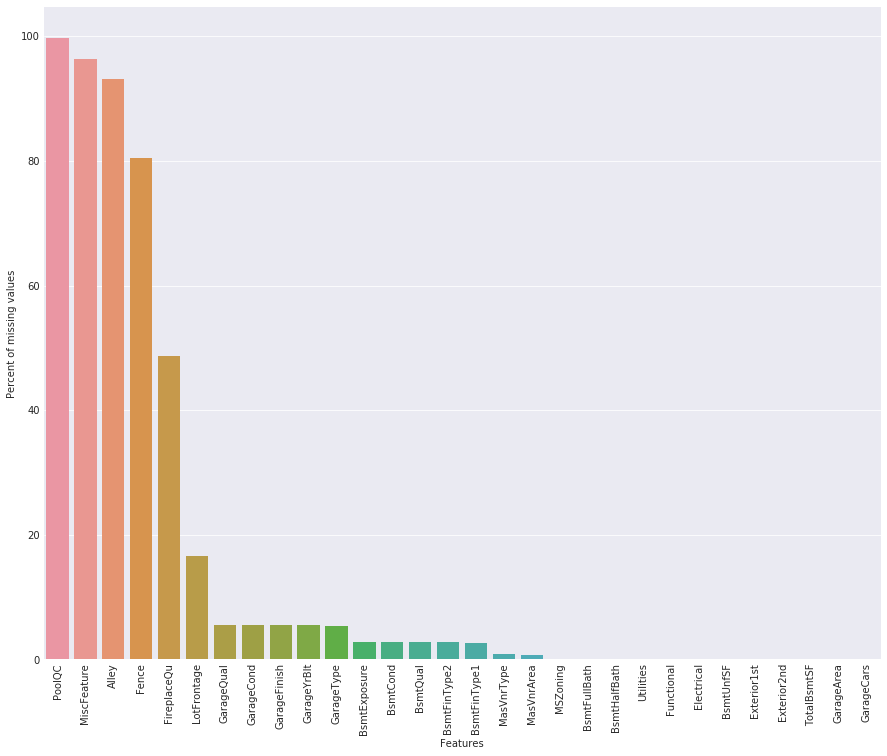

In [14]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features')
plt.ylabel('Percent of missing values')

### Data Correlation

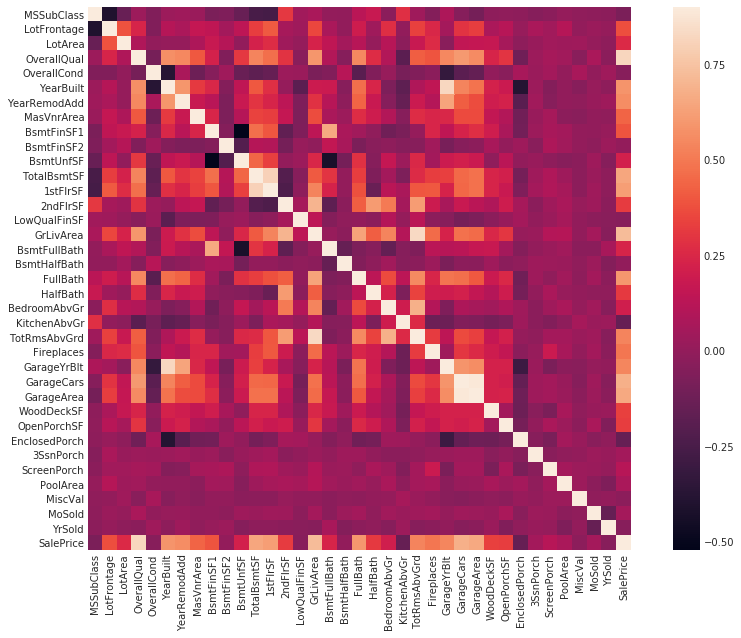

In [15]:
corrmat = train.corr()

plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Imputing Missing Values

In [16]:
# PoolQC
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

# MiscFeature
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

# Alley
all_data['Alley'] = all_data['Alley'].fillna('None')

#Fence
all_data['Fence'] = all_data['Fence'].fillna('None')

#FirePlaceQu
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

# LotFrontage
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
lambda x : x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual, GarageCond
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 BsmtFinType2
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
# MasVnrArea, MasVnrType
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

# MSzoning
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Utilities
all_data = all_data.drop(['Utilities'], axis=1)

# Functional
all_data['Functional'] = all_data['Functional'].fillna('Typ')

#Electrical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

# KitchenQual
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# Exterior1st, Exterior2nd
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

# SaleType
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# MSSubClass
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

In [17]:
### Check Remaining Missing Values

all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na ==0].index).sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing_Ratio' : all_data_na})
missing_data.head()

,Missing_Ratio


### More Feature Engineering

In [18]:
# MSSubClass = Building Class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

# Changing OverallCond into a Categorical Variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

# Year and Month Sold Transform into categorical features
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual',
       'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2',
       'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape',
       'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')


# Label Encoding
for c in cols:
    lbl = LabelEncoder()
    all_data[c] = lbl.fit_transform(list(all_data[c].values))
    
print('Shape all_data : {}'.format(all_data.shape))

Shape all_data : (2917, 78)


### Add one more feature

In [20]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Skewed Feature

In [21]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print("\n Skew in numerical features : \n" )
skewness = pd.DataFrame({'Skew' : skewed_feats })
skewness.head(10)


 Skew in numerical features : 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


### Box Cox Transformation

In [22]:
skewness = skewness[abs(skewness) > 0.75]
print('there are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15

for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

there are 59 skewed numerical features to Box Cox transform


### Getting Dummy Categorical features

In [23]:
all_data = pd.get_dummies(all_data)

print(all_data.shape)
print(all_data.head())

(2917, 220)
   1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BsmtCond  BsmtExposure  \
0    11.693    11.686      0.000  0.730         1.541     1.820         1.541   
1    12.792     0.000      0.000  0.730         1.541     1.820         0.730   
2    11.892    11.725      0.000  0.730         1.541     1.820         1.194   
3    12.014    11.354      0.000  0.730         1.541     0.730         1.541   
4    12.511    12.271      0.000  0.730         1.820     1.820         0.000   

   BsmtFinSF1  BsmtFinSF2  BsmtFinType1     ...       SaleCondition_Partial  \
0      11.170       0.000         1.194     ...                           0   
1      12.063       0.000         0.000     ...                           0   
2      10.200       0.000         1.194     ...                           0   
3       8.274       0.000         0.000     ...                           0   
4      10.971       0.000         1.194     ...                           0   

   SaleType_COD  SaleType_

In [24]:
train = all_data[:ntrain]
test = all_data[:ntest]

print(train.shape)
print(test.shape)

(1458, 220)
(1459, 220)


### Modeling

In [25]:
!pip install xgboost

     |████████████████████████████████| 142.8MB 1.5kB/s eta 0:00:01   |█                               | 4.0MB 144kB/s eta 0:16:03     |███▉                            | 17.2MB 870kB/s eta 0:02:25     |████▋                           | 20.7MB 1.9MB/s eta 0:01:05     |█████████▋                      | 42.9MB 2.0MB/s eta 0:00:51     |██████████▏                     | 45.4MB 153kB/s eta 0:10:36     |██████████████▏                 | 63.2MB 199kB/s eta 0:06:40     |██████████████▋                 | 65.0MB 199kB/s eta 0:06:31     |█████████████████████▉          | 97.3MB 177kB/s eta 0:04:17     |██████████████████████████      | 116.5MB 1.5MB/s eta 0:00:18     |██████████████████████████▎     | 117.1MB 5.5MB/s eta 0:00:05     |██████████████████████████▎     | 117.4MB 5.5MB/s eta 0:00:05   | 121.9MB 202kB/s eta 0:01:44��█████████▋   | 127.8MB 184kB/s eta 0:01:22��█████████▉   | 128.9MB 184kB/s eta 0:01:16     |█████████████████████████████▏  | 129.9MB 184kB/s eta 0:01:10     |██████████████

In [26]:
!pip install lightgbm

     |████████████████████████████████| 1.3MB 2.8MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### Cross Validation Strategy

In [28]:
#Validation Function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train,
                                    scoring='neg_mean_squared_error', cv=kf))
    return rmse

### Base Models

#### 1. Lasso Regression

In [29]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

#### 2. ElasticNet Regression

In [30]:
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

#### 3. Kernel Ridge

In [ ]:
### TO be

#### 4. Gradient Boosting Regression

In [31]:
gboost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                  max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                  loss='huber', random_state=5)

#### 5. Xgboost

In [32]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
                            max_depth=3, min_child_weight=1.7817, n_estimators=2200,
                            reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1,
                            random_state=7, nthread=-1)

#### 6. LightGBM

In [33]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05,
                             n_estimators=720, max_bin=55, bagging_fraction=0.8,
                             bagging_freq=5, feature_fraction=0.2319, feature_fraction_seed=9,
                             bagging_seed=9, min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

### Model Score

In [34]:
score = rmsle_cv(lasso)
print('\n Lasso Score :  {:.4f}  ({:.4f})\n'.format(score.mean(), score.std()))


 Lasso Score :  0.1115  (0.0074)



In [35]:
score = rmsle_cv(Enet)
print('\n ElasticNet Score :  {:.4f}  ({:.4f})\n'.format(score.mean(), score.std()))


 ElasticNet Score :  0.1116  (0.0074)



In [36]:
score = rmsle_cv(gboost)
print('\n gboost Score :  {:.4f}  ({:.4f})\n'.format(score.mean(), score.std()))

KeyboardInterrupt: 

In [38]:
score = rmsle_cv(model_xgb)
print('\n xgb Score :  {:.4f}  ({:.4f})\n'.format(score.mean(), score.std()))


 xgb Score :  0.1168  (0.0058)



In [39]:
score = rmsle_cv(model_lgb)
print('\n lgb Score :  {:.4f}  ({:.4f})\n'.format(score.mean(), score.std()))


 lgb Score :  0.1167  (0.0073)



### Stacking Models

In [40]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

#### Averaged Models Score

In [42]:
averaged_models = AveragingModels(models = (Enet, gboost, lasso))

score = rmsle_cv(averaged_models)

print("Averaged base Models score : {:.4f}  ({:.4f})\n".format(score.mean(), score.std()))

Averaged base Models score : 0.1091  (0.0075)



### Adding a Meta Model

In [49]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

#### Stacking Averaged models Score

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models=(Enet, gboost),
                                                meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))